In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import sys
import astropy
from astropy import stats
import figurefirst as fifi

In [2]:
sys.path.append('/home/jhoule/Downloads/gps_wind_station-master') # add path where the following python modules live

In [3]:
import load_windgps_data_to_pandas
import process_windgps_data

In [46]:
# where your binary data files are
data_directoryA = '/home/jhoule/Desktop/noisetest/0000027/'
correct_year = 2022
out = '.' # in this directory
df1 = load_windgps_data_to_pandas.load_data_from_directory(data_directoryA)
df1 = process_windgps_data.parse_and_save_several_wind_strings(df1, wind_strings=['S2', 'D', 'T', 'U', 'V', 'W', 'MD', 'AX', 'AY', 'AZ', 'TD'])

In [223]:
df=pd.read_hdf('/home/jhoule/Desktop/noisetest/noisetest.hdf')

In [239]:
from scipy.stats import norm

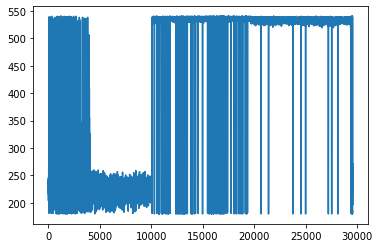

In [309]:
plt.plot(df1.D+180)

In [307]:
def fixangle(angle):
    if angle>180:
        angle=angle-180
    if newangle<0:
        angle=angle+360
    return newangle

In [286]:
def fixangle(angle):
    if angle<0:
        angle=angle+180
    return angle

In [294]:
test=np.zeros(len(df1.D.iloc[15000:30000]))

In [308]:
for i in range(0, len(test)):
    test[i]=fixangle(df1.D[15000+i]-180)

NameError: name 'newangle' is not defined

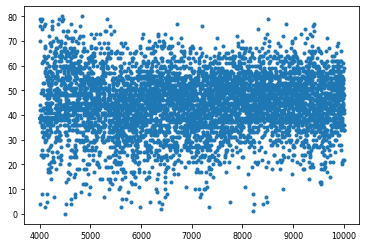

In [354]:
plt.plot(df1.D.iloc[4000:10000], '.')

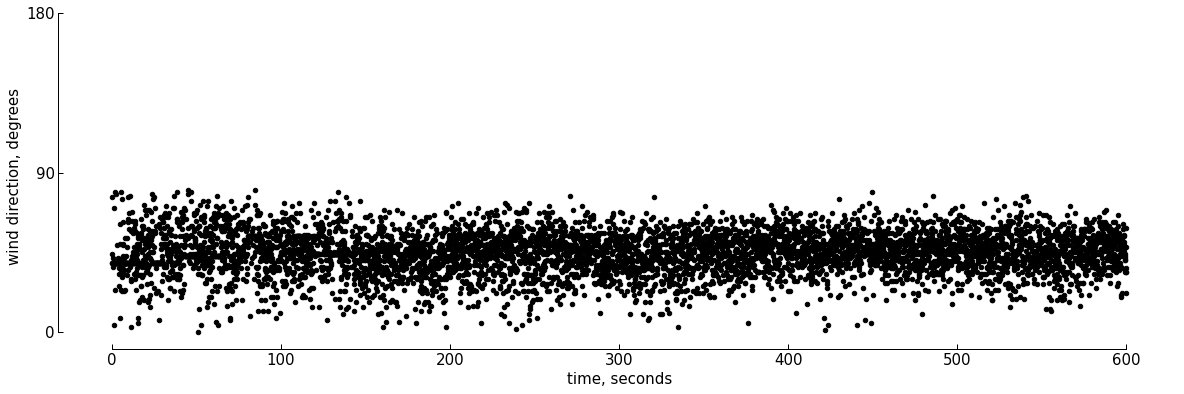

In [363]:
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(t, df1.D.iloc[4000:10000], s=20, color= 'k')
ax.set_ylabel('wind direction, degrees')
ax.set_xlabel('time, seconds')
fifi.mpl_functions.adjust_spines(ax, 
                                  ['left', 'bottom'], 
                                  yticks=[0,90,180],
                                  xticks=[0,100,200,300,400,500,600], 
                                  tick_length=5,
                                  spine_locations={'left': 3, 'bottom': 10}, 
                                  linewidth=1)
#fig.subplots_adjust(wspace=0.2)
fifi.mpl_functions.set_fontsize(ax, 15)                                 

In [276]:
test

array([0., 0., 0., ..., 0., 0., 0.])

In [258]:
adjusted_d=df1.D+180

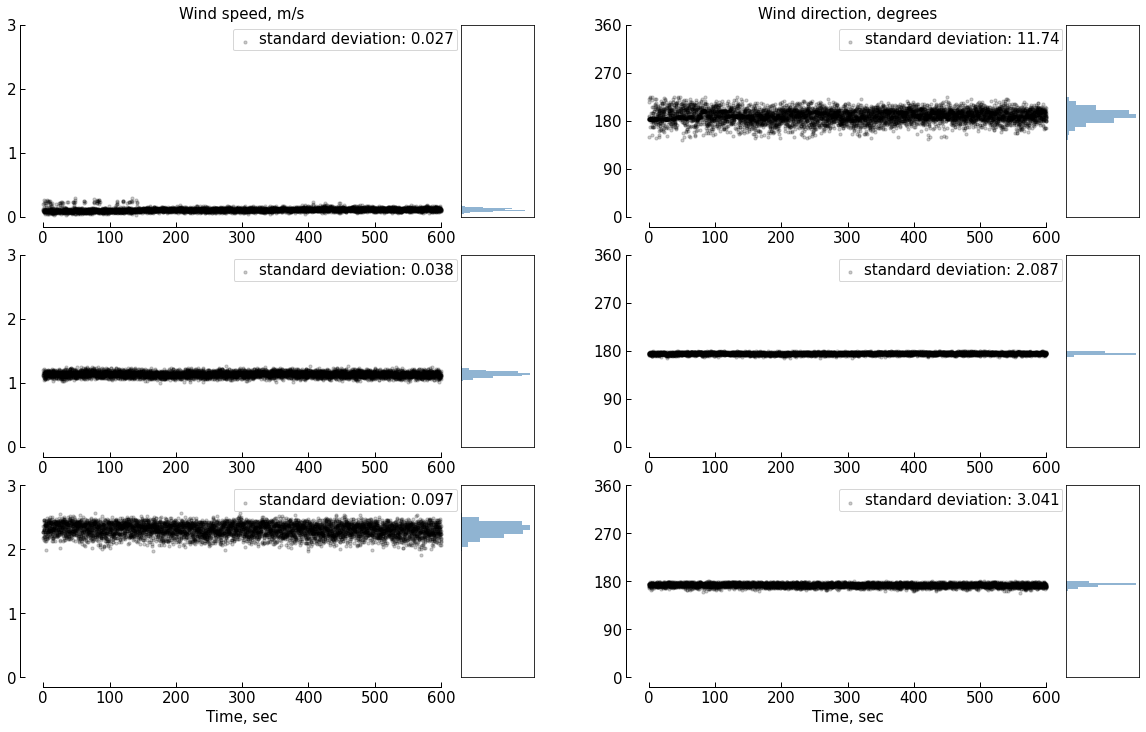

In [351]:
gridspec = dict(wspace=0.0, hspace=.2, width_ratios=[3, .5,.65,3,.5])
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(20,12), gridspec_kw=gridspec)
ax[0,2].set_visible(False)
ax[1,2].set_visible(False)
ax[2,2].set_visible(False)
t=np.linspace(0,600, 6000)

ax[0,0].scatter(t, df1.S2.iloc[4000:10000], s=10, color= 'k', alpha=.2, label=("standard deviation: %s" % np.round(np.std(df1.S2.iloc[4000:10000]),3)))
ax[1,0].scatter(t, df1.S2.iloc[12000:18000], s=10, color= 'k', alpha=.2, label=("standard deviation: %s" % np.round(np.std(df1.S2.iloc[12000:18000]),3)))
ax[2,0].scatter(t, df1.S2.iloc[21000:27000], s=10, color= 'k', alpha=.2, label=("standard deviation: %s" % np.round(np.std(df1.S2.iloc[21000:27000]),3)))

ax[0,1].hist(df1.S2.iloc[4000:10000], bins=100, orientation = 'horizontal', color='steelblue', alpha=0.6)
ax[1,1].hist(df1.S2.iloc[12000:18000],bins=10, orientation = 'horizontal', color='steelblue', alpha=0.6)
ax[2,1].hist(df1.S2.iloc[21000:27000],bins=10, orientation = 'horizontal', color='steelblue', alpha=0.6)



ax[0,3].scatter(t, df1.D.iloc[4000:10000]+145, s=10, color= 'k', alpha=.2, label=("standard deviation: %s" % np.round(np.rad2deg(astropy.stats.circstd(np.deg2rad(df1.D.iloc[4000:10000]+180))),3)))
ax[1,3].scatter(t, df1.D.iloc[12000:18000]-180, s=10, color= 'k', alpha=.2, label=("standard deviation: %s" % np.round(np.rad2deg(astropy.stats.circstd(np.deg2rad(df1.D.iloc[12000:18000]-180))),3)))
ax[2,3].scatter(t, df1.D.iloc[21000:27000]-180, s=10, color= 'k',  alpha=.2,label=("standard deviation: %s" % np.round(np.rad2deg(astropy.stats.circstd(np.deg2rad(df1.D.iloc[21000:27000]-180))),3)))



ax[0,4].hist(df1.D.iloc[4000:10000]+145, bins=10, orientation = 'horizontal', color='steelblue', alpha=0.6)
ax[1,4].hist(df1.D.iloc[12000:18000]-180,bins=100, orientation = 'horizontal', color='steelblue', alpha=0.6)
ax[2,4].hist(df1.D.iloc[21000:27000]-180, bins=100,orientation = 'horizontal', color='steelblue', alpha=0.6)

ax[0,0].set_ylim(0,3)
ax[1,0].set_ylim(0,3)
ax[2,0].set_ylim(0,3)
ax[0,1].set_ylim(0,3)
ax[1,1].set_ylim(0,3)
ax[2,1].set_ylim(0,3)
ax[0,3].set_ylim(0,360)
ax[1,3].set_ylim(0,360)
ax[2,3].set_ylim(0,360)
ax[0,4].set_ylim(0,360)
ax[1,4].set_ylim(0,360)
ax[2,4].set_ylim(0,360)

ax[0,0].legend(loc='upper right')
ax[1,0].legend(loc='upper right')
ax[2,0].legend(loc='upper right')

ax[0,3].legend(loc='upper right')
ax[1,3].legend(loc='upper right')
ax[2,3].legend(loc='upper right')

                
                
ax[0,0].set_title('Wind speed, m/s')
ax[0,3].set_title('Wind direction, degrees')
ax[2,0].set_xlabel('Time, sec')
ax[2,3].set_xlabel('Time, sec')

#plt.tight_layout(pad=0.2, w_pad=2, h_pad=.5)


fifi.mpl_functions.adjust_spines(ax[0,0], 
                                  ['left', 'bottom'], 
                                  yticks=[0,1,2,3],
                                  xticks=[0,100,200,300,400,500,600], 
                                  tick_length=5,
                                  spine_locations={'left': 3, 'bottom': 10}, 
                                  linewidth=1)
                                 
fifi.mpl_functions.adjust_spines(ax[1,0], 
                                  ['left', 'bottom'], 
                                  yticks=[0,1,2,3],
                                  xticks=[0,100,200,300,400,500,600], 
                                  tick_length=5,
                                  spine_locations={'left': 3, 'bottom': 10}, 
                                  linewidth=1)
                                 
fifi.mpl_functions.adjust_spines(ax[2,0], 
                                  ['left', 'bottom'], 
                                  yticks=[0,1,2,3],
                                  xticks=[0,100,200,300,400,500,600], 
                                  tick_length=5,
                                  spine_locations={'left': 3, 'bottom': 10}, 
                                  linewidth=1)      

fifi.mpl_functions.adjust_spines(ax[0,3], 
                                  ['left', 'bottom'],
                                  yticks=[0,90,180,270,360],
                                  xticks=[0,100,200,300,400,500,600], 
                                  tick_length=5,
                                  spine_locations={'left': 3, 'bottom': 10}, 
                                  linewidth=1)
                                 
fifi.mpl_functions.adjust_spines(ax[1,3], 
                                  ['left', 'bottom'], 
                                  yticks=[0,90,180,270,360],
                                  xticks=[0,100,200,300,400,500,600], 
                                  tick_length=5,
                                  spine_locations={'left': 3, 'bottom': 10}, 
                                  linewidth=1)
                                 
fifi.mpl_functions.adjust_spines(ax[2,3], 
                                  ['left', 'bottom'],
                                  yticks=[0,90,180,270,360],
                                  xticks=[0,100,200,300,400,500,600], 
                                  tick_length=5,
                                  spine_locations={'left': 3, 'bottom': 10}, 
                                  linewidth=1)      

# for the histograms 

                                 
ax[0,1].tick_params(axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelbottom=False, labelleft=False)

ax[1,1].tick_params(axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelbottom=False, labelleft=False)
ax[2,1].tick_params(axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelbottom=False, labelleft=False)
                                 
ax[0,4].tick_params(axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelbottom=False, labelleft=False)

ax[1,4].tick_params(axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelbottom=False, labelleft=False)
ax[2,4].tick_params(axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelbottom=False, labelleft=False)

#fig.subplots_adjust(wspace=0.2)
fifi.mpl_functions.set_fontsize(ax[0,0], 15)



In [326]:
mpl.rcParams.update({'font.size': 22})

(0.0, 3.0)

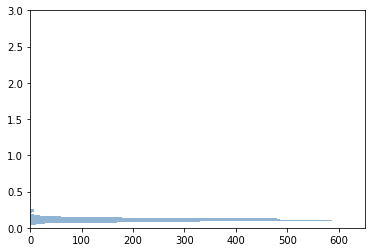

In [248]:
plt.hist(df1.S2.iloc[4000:10000], bins=50, orientation = 'horizontal', color='steelblue', alpha=0.6)
plt.ylim(0,3)